## Imports:

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Importerer data:

In [2]:
df = pd.read_csv("../data/processed_data/train.csv")

C:\Users\Tobias\AppData\Local\Temp\ipykernel_8484\540487812.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed_data/train.csv")


# lager korelasjons matrise:

In [3]:
numeric_df = df.select_dtypes(include="number")
correlation_matrix = numeric_df.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                aspect="auto")

# Update layout to ensure all y-axis labels are shown
fig.update_layout(
    yaxis=dict(
        tickmode='linear',  # Ensure all y-axis ticks are included
        tick0=0,            # Starting tick
        dtick=1             # Step size for ticks (1 ensures every category gets a label)
    ),xaxis=dict(
        tickmode='linear',  # Ensure all x-axis ticks are included
        tick0=0,            # Starting tick
        dtick=1             # Step size for ticks (1 ensures every category gets a label)
    ),
    autosize=False,  # Disable automatic size adjustment
    height=800,     # Set the height to ensure enough space for labels
    width=800       # Adjust width if necessary
)

fig.show()

# Fligth count inspection:

<Axes: >

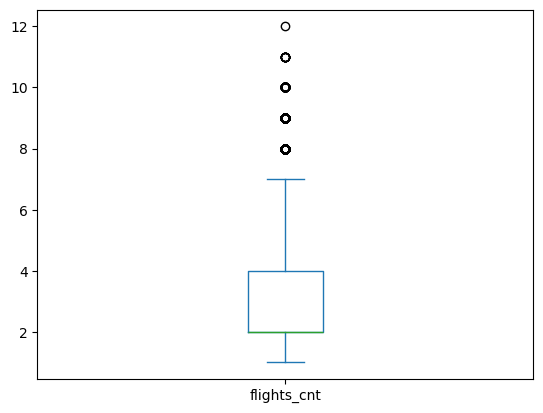

In [4]:
df["flights_cnt"].plot.box()

<Axes: >

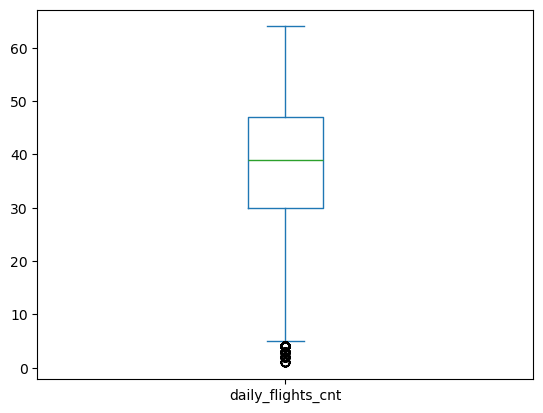

In [5]:
df["daily_flights_cnt"].plot.box()

Number of flights v target:

In [6]:
import plotly.graph_objects as go

target_avg = df.groupby("flights_cnt")[["target_actual","target_sched"]].mean().round(2)

fig = go.Figure()

# Add each column as its own bar trace
for col in target_avg.columns:
    fig.add_trace(
        go.Bar(
            x=target_avg.index,
            y=target_avg[col],
            name=col,
            text=target_avg[col],
            textposition='auto'
        )
    )

fig.update_layout(
    title="Average target value per flightcount",
    xaxis_title="flightcount",
    yaxis_title="Average of target",
    barmode='group'  # or 'stack'
)

fig.show()


In [18]:
import pandas as pd
import plotly.express as px

a = "daily_flights_cnt"
b1 = "target_actual"
b2 = "target_sched"

# Reshape data so both targets are in one column
df_long = df.melt(
    id_vars=[a], 
    value_vars=[b1, b2], 
    var_name="target_type", 
    value_name="target_value"
)

fig = px.histogram(
    df_long.dropna(subset=[a, "target_value"]),
    x=a,
    y="target_value",
    color="target_type",   # <- distinguishes actual vs sched
    barmode="overlay",     # or "stack"
    opacity=0.6,           # transparency helps if overlaying
    color_discrete_map={b1: "blue", b2: "red"}
)

fig.update_layout(title=f"Comparison of {a} with {b1} and {b2}")
fig.show()


# Do any airport groups suck?

In [19]:
target_avg = df.groupby("airport_group")[["target_actual","target_sched"]].mean().round(2)

fig = go.Figure()

# Add each column as its own bar trace
for col in target_avg.columns:
    fig.add_trace(
        go.Bar(
            x=target_avg.index,
            y=target_avg[col],
            name=col,
            text=target_avg[col],
            textposition='auto'
        )
    )

fig.update_layout(
    title="Average target value per flightcount",
    xaxis_title="flightcount",
    yaxis_title="Average of target",
    barmode='group'  # or 'stack'
)

fig.show()


# Do any airlines suck?

In [22]:
# Count how many rows (flights) per airline
airline_counts = df["airline"].value_counts()

# Keep only airlines with >100 rows
valid_airlines = airline_counts[airline_counts > 100].index

# Filter df and then compute means
target_avg = (
    df[df["airline"].isin(valid_airlines)]
      .groupby("airline")[["target_actual", "target_sched"]]
      .mean()
      .round(2)
)

fig = go.Figure()

# Add each column as its own bar trace
for col in target_avg.columns:
    fig.add_trace(
        go.Bar(
            x=target_avg.index,
            y=target_avg[col],
            name=col,
            text=target_avg[col],
            textposition='auto'
        )
    )

fig.update_layout(
    title="Average target value per flightcount",
    xaxis_title="flightcount",
    yaxis_title="Average of target",
    barmode='group'  # or 'stack',
)

fig.show()
